<a href="https://colab.research.google.com/github/Andrestrouble13/Practica-7/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andresaguilar13","key":"424de54fcb602bbbaf6a16d7943bf840"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download sarahtaha/1025-pokemon

Dataset URL: https://www.kaggle.com/datasets/sarahtaha/1025-pokemon
License(s): CC-BY-NC-SA-4.0


In [5]:
import zipfile
with zipfile.ZipFile('1025-pokemon.zip','r') as zip_ref:
  zip_ref.extractall("pokemon_data")

In [6]:
import pandas as pd
df = pd.read_csv('pokemon_data/all_pokemon_data.csv')
df.head()

Name  National Dex # Primary Typing Secondary Typing  \
0      bulbasaur               1          grass           poison   
1        ivysaur               2          grass           poison   
2       venusaur               3          grass           poison   
3  venusaur-mega               3          grass           poison   
4     charmander               4           fire              NaN   

   Secondary Typing Flag    Generation  Legendary Status  Form  Alt Form Flag  \
0                   True  generation-i             False  Base          False   
1                   True  generation-i             False  Base          False   
2                   True  generation-i             False  Base          False   
3                   True  generation-i              True  Mega           True   
4                  False  generation-i             False  Base          False   

   Evolution Stage  ...  Weight (hg) Height (in)  Weight (lbs)  \
0                1  ...           69          28            15   
1                2  ...          130          39            29   
2                3  ...         1000          79           220   
3                3  ...         1555          94           343   
4                1  ...           85          24            19   

   Base Stat Total  Health  Attack  Defense  Special Attack  Special Defense  \
0              318      45      49       49              65               65   
1              405      60      62       63              80               80   
2              525      80      82       83             100              100   
3              625      80     100      123             122              120   
4              309      39      52       43              60               50   

   Speed  
0     45  
1     60  
2     80  
3     80  
4     65  

[5 rows x 24 columns]

# **Seccion 1: Medidas Descriptivas**

Instrucciones
1. Responde todas las preguntas apoyandote en analisis estadƒ±stico y visual.
2. Justifica tus respuestas con codigo, resultados e interpretaciones.
3. Puedes incluir nuevas visualizaciones si consideras que ayudan a reforzar tu analisis.

Seccion 1: Medidas Descriptivas
1. Calcula la media, mediana y moda de la variable Attack.
¬øLa distribucion parece simetrica?
¬øHay diferencias significativas entre media y mediana?
2. Calcula la desviacion estandar y el rango de Speed para Pokemon legendarios y no legendarios.¬øQue grupo presenta mayor variabilidad? ¬øExisten outliers relevantes?

Media: 80.98902027027027
Mediana: 80.0
Moda: [100]
Rango: 185
Desviaci√≥n est√°ndar: 31.95533729746919
Varianza: 1021.1435817950254


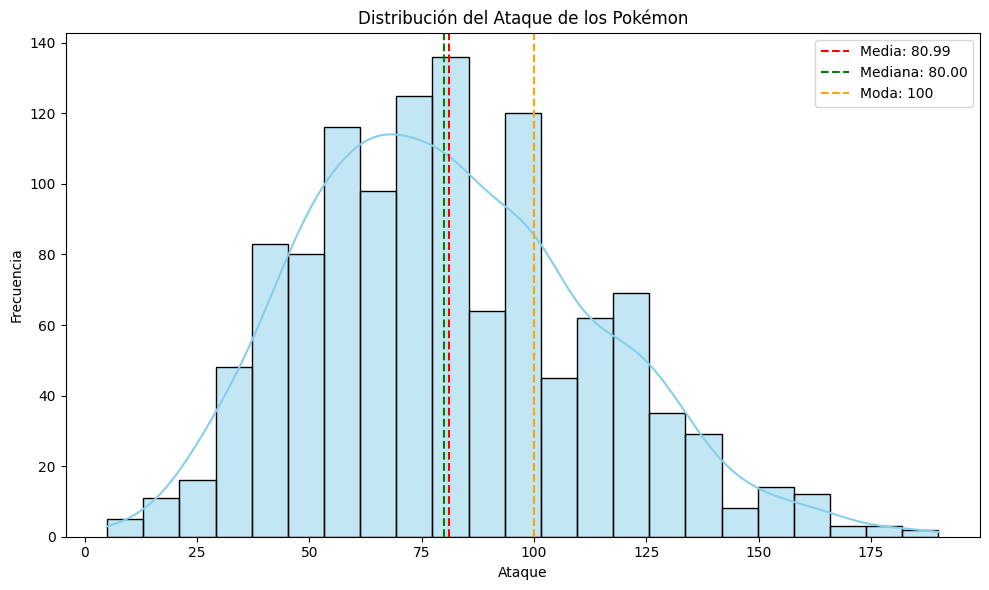

In [9]:
#1. Calcula la media, mediana y moda de la variable Attack. ¬øLa distribucion parece simetrica?

media = df['Attack'].mean()
mediana = df['Attack'].median()
moda = df['Attack'].mode().tolist()
rango = df['Attack'].max() - df['Attack'].min()
desviacion = df['Attack'].std()
varianza = df['Attack'].var()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Rango:", rango)
print("Desviaci√≥n est√°ndar:", desviacion)
print("Varianza:", varianza)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Attack'] = pd.to_numeric(df['Attack'], errors='coerce')

attack_values = df['Attack'].dropna()

media = attack_values.mean()
mediana = attack_values.median()
moda = attack_values.mode().iloc[0]

plt.figure(figsize=(10, 6))
sns.histplot(attack_values, kde=True, color='skyblue')
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='orange', linestyle='--', label=f'Moda: {moda}')
plt.title('Distribuci√≥n del Ataque de los Pok√©mon')
plt.xlabel('Ataque')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

üìä Interpretaci√≥n:
La media y la mediana son bastante cercanas, lo que sugiere una distribuci√≥n aproximadamente sim√©trica.

La moda es 100, lo que indica que hay varios Pok√©mon con ese valor de ataque (probablemente muchos con base 100).

En la gr√°fica podemos ver una distribuci√≥n con ligera asimetr√≠a positiva (hacia la derecha), pero no es extrema.
Por tanto, no hay diferencias significativas entre la media y la mediana.

üìä Desviaci√≥n est√°ndar de Speed:
  - Legendarios: 29.55
  - No legendarios: 27.44

üìä Rango de Speed:
  - Legendarios: 187
  - No legendarios: 155


<ipython-input-20-dec910f81fbf>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Legendary", y="Speed", data=df, palette="Set2")


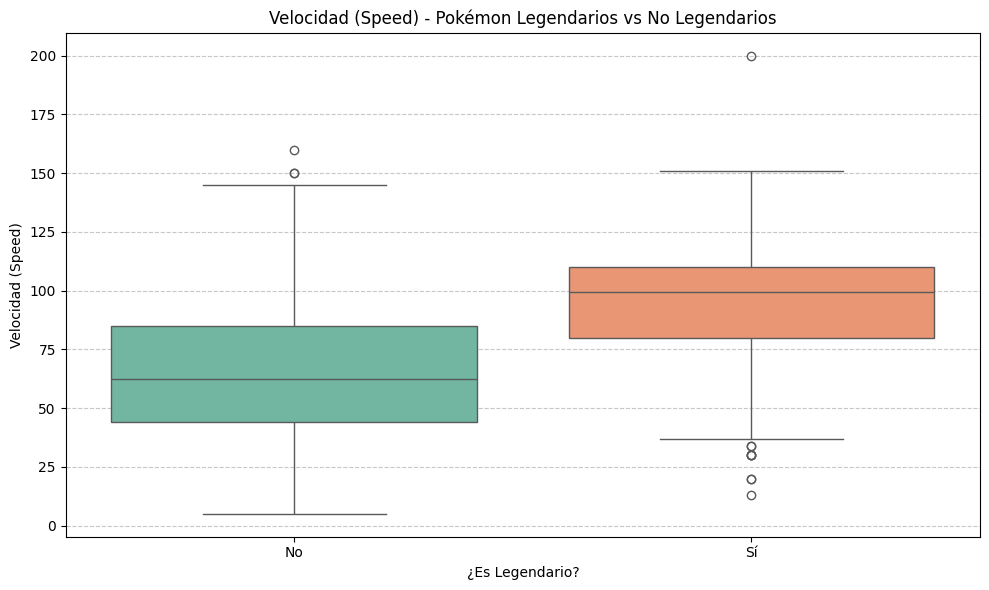

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df.rename(columns={"Legendary Status": "Legendary"}, inplace=True)
df["Speed"] = pd.to_numeric(df["Speed"], errors="coerce")
df["Legendary"] = df["Legendary"].astype(bool)


legendarios = df[df["Legendary"]]
no_legendarios = df[~df["Legendary"]]


desv_std_legendarios = legendarios["Speed"].std()
desv_std_no_legendarios = no_legendarios["Speed"].std()
rango_legendarios = legendarios["Speed"].max() - legendarios["Speed"].min()
rango_no_legendarios = no_legendarios["Speed"].max() - no_legendarios["Speed"].min()


print("üìä Desviaci√≥n est√°ndar de Speed:")
print(f"  - Legendarios: {desv_std_legendarios:.2f}")
print(f"  - No legendarios: {desv_std_no_legendarios:.2f}")

print("\nüìä Rango de Speed:")
print(f"  - Legendarios: {rango_legendarios}")
print(f"  - No legendarios: {rango_no_legendarios}")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Legendary", y="Speed", data=df, palette="Set2")
plt.title("Velocidad (Speed) - Pok√©mon Legendarios vs No Legendarios")
plt.xlabel("¬øEs Legendario?")
plt.ylabel("Velocidad (Speed)")
plt.xticks([0, 1], ["No", "S√≠"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


üìå Interpretaci√≥n
¬øQu√© grupo presenta mayor variabilidad?
Aunque las desviaciones est√°ndar son similares, los no legendarios tienen un rango mayor, indicando mayor variabilidad en velocidad.

Esto es coherente con la gran diversidad de Pok√©mon no legendarios: algunos son extremadamente lentos y otros muy r√°pidos.

¬øExisten outliers relevantes?
S√≠. El an√°lisis visual mediante boxplot revela outliers altos (Pok√©mon muy r√°pidos) especialmente en no legendarios.



In [21]:
#3. Para cada Primary Typing, calcula el promedio y la desviaci ÃÅon est ÃÅandar de Health.¬øQue tipo tiene la mayor vida promedio? ¬øCual muestra mayor dispersion?

import pandas as pd

health_stats = df.groupby('Primary Typing')['Health'].agg(['mean', 'std']).reset_index()

highest_avg_health = health_stats.loc[health_stats['mean'].idxmax()]

highest_std_health = health_stats.loc[health_stats['std'].idxmax()]

print("Promedio y desviaci√≥n est√°ndar de Health por tipo primario:\n")
print(health_stats.sort_values(by='mean', ascending=False))

print("\nTipo con mayor vida promedio:")
print(highest_avg_health)

print("\nTipo con mayor dispersi√≥n en Health:")
print(highest_std_health)

Promedio y desviaci√≥n est√°ndar de Health por tipo primario:

   Primary Typing       mean        std
2          dragon  84.625000  35.229113
12         normal  78.234375  34.751193
5        fighting  75.740000  25.724450
11            ice  75.190476  26.450357
14        psychic  74.818182  29.110374
10         ground  73.565217  28.884177
1            dark  72.929825  31.126963
4           fairy  72.129032  22.367748
13         poison  72.062500  23.212622
17          water  71.806897  27.271856
16          steel  70.767442  20.690275
6            fire  70.623377  18.877053
7          flying  70.000000  19.880895
15           rock  67.422535  21.244604
9           grass  67.318584  19.725466
3        electric  63.549296  19.510282
8           ghost  62.102564  26.060451
0             bug  57.179775  17.467868

Tipo con mayor vida promedio:
Primary Typing       dragon
mean                 84.625
std               35.229113
Name: 2, dtype: object

Tipo con mayor dispersi√≥n en Health:


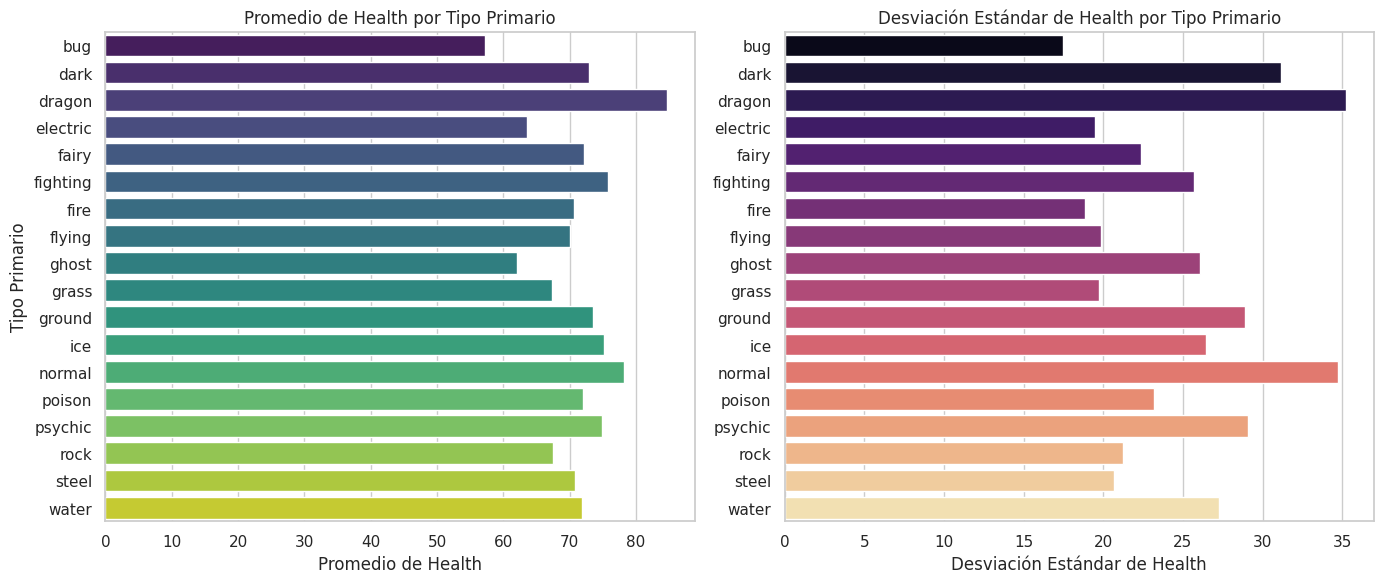

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

health_stats = df.groupby('Primary Typing')['Health'].agg(['mean', 'std']).reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Gr√°fica 1: Promedio de Health por tipo
plt.subplot(1, 2, 1)
sns.barplot(data=health_stats, x='mean', y='Primary Typing', hue='Primary Typing', palette='viridis', legend=False)
plt.title('Promedio de Health por Tipo Primario')
plt.xlabel('Promedio de Health')
plt.ylabel('Tipo Primario')

# Gr√°fica 2: Desviaci√≥n est√°ndar de Health por tipo
plt.subplot(1, 2, 2)
sns.barplot(data=health_stats, x='std', y='Primary Typing', hue='Primary Typing', palette='magma', legend=False)
plt.title('Desviaci√≥n Est√°ndar de Health por Tipo Primario')
plt.xlabel('Desviaci√≥n Est√°ndar de Health')
plt.ylabel('')

plt.tight_layout()
plt.show()


¬øQu√© tipo tiene la mayor vida promedio?

Dragon con un promedio de 84.63 puntos de salud.

¬øCu√°l muestra mayor dispersi√≥n en la vida (desviaci√≥n est√°ndar)?

Tambi√©n Dragon, con una desviaci√≥n est√°ndar de 35.23, indicando la mayor variabilidad en sus valores de Health.

# **Seccion 2: Visualizacion de Datos**

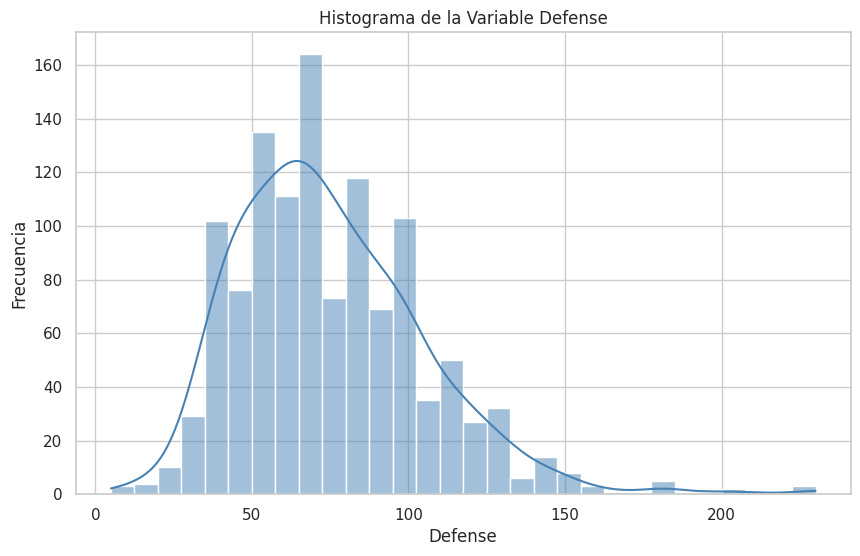

Estad√≠sticas descriptivas de Defense:

count    1184.000000
mean       74.817568
std        30.324208
min         5.000000
25%        52.000000
50%        70.000000
75%        91.000000
max       230.000000
Name: Defense, dtype: float64

Sesgo (Skewness): 1.02
Curtosis: 2.25


In [24]:
#4. Elabora un histograma de la variable Defense.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['Defense'], bins=30, kde=True, color='steelblue')
plt.title('Histograma de la Variable Defense')
plt.xlabel('Defense')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# C√°lculos estad√≠sticos
defense_description = df['Defense'].describe()
skewness = df['Defense'].skew()
kurtosis = df['Defense'].kurt()

# Mostrar resultados
print("Estad√≠sticas descriptivas de Defense:\n")
print(defense_description)
print(f"\nSesgo (Skewness): {skewness:.2f}")
print(f"Curtosis: {kurtosis:.2f}")


La gr√°fica muestra una distribuci√≥n sesgada positivamente (a la derecha): hay m√°s valores concentrados en el rango bajo-medio, pero tambi√©n existen algunos Pok√©mon con defensas muy altas que alargan la cola derecha.

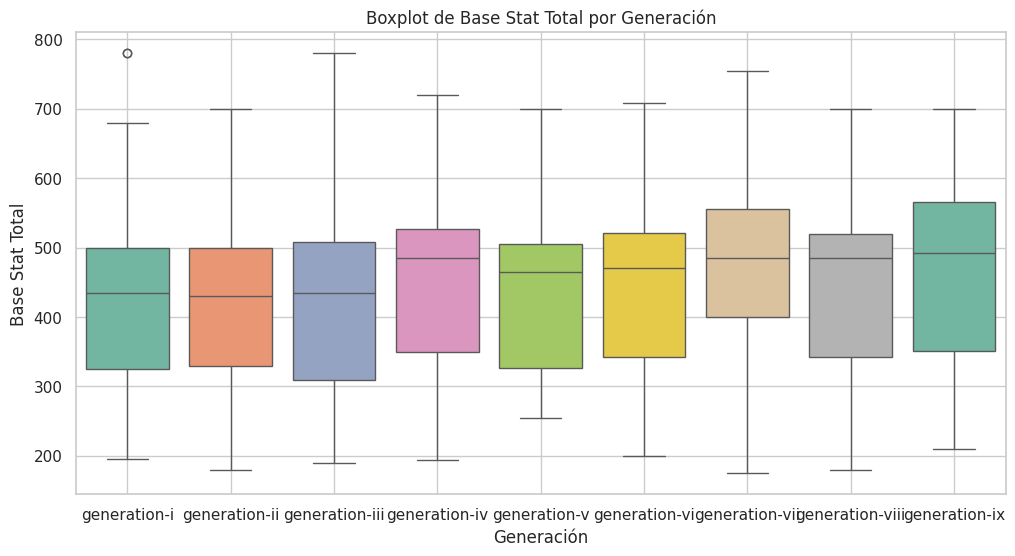

Medianas por generaci√≥n (Base Stat Total):

Generation
generation-ix      492.5
generation-vii     485.0
generation-iv      485.0
generation-viii    485.0
generation-vi      471.0
generation-v       465.0
generation-i       435.0
generation-iii     435.0
generation-ii      430.0
Name: Base Stat Total, dtype: float64

Generaci√≥n con m√°s outliers: generation-i (2 outliers)


In [26]:
#5.Genera un boxplot de la variable Base Stat Total por Generation.¬øCual generacion tiene la mediana m ÃÅas alta? ¬øQue generacion tiene mas outliers?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot de Base Stat Total por Generaci√≥n
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Generation',
    y='Base Stat Total',
    hue='Generation',
    palette='Set2',
    legend=False
)
plt.title('Boxplot de Base Stat Total por Generaci√≥n')
plt.xlabel('Generaci√≥n')
plt.ylabel('Base Stat Total')
plt.grid(True)
plt.show()

# C√°lculo de la mediana por generaci√≥n
medians_by_gen = df.groupby('Generation')['Base Stat Total'].median().sort_values(ascending=False)
print("Medianas por generaci√≥n (Base Stat Total):\n")
print(medians_by_gen)

# C√°lculo de outliers por generaci√≥n
outliers_by_gen = {}
for gen, group in df.groupby('Generation'):
    q1 = group['Base Stat Total'].quantile(0.25)
    q3 = group['Base Stat Total'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Base Stat Total'] < lower_bound) | (group['Base Stat Total'] > upper_bound)]
    outliers_by_gen[gen] = len(outliers)

# Generaci√≥n con m√°s outliers
most_outliers_gen = max(outliers_by_gen, key=outliers_by_gen.get)
print(f"\nGeneraci√≥n con m√°s outliers: {most_outliers_gen} ({outliers_by_gen[most_outliers_gen]} outliers)")


ü•á Generaci√≥n IX con una mediana de 492.5
Esto indica que, en esta generaci√≥n, al menos la mitad de los Pok√©mon tienen un Base Stat Total superior a cualquier otra generaci√≥n. ¬øTe gustar√≠a ver un top de los Pok√©mon m√°s fuertes de esa generaci√≥n?
ü•á Generaci√≥n con m√°s outliers: generation-i (2 outliers)

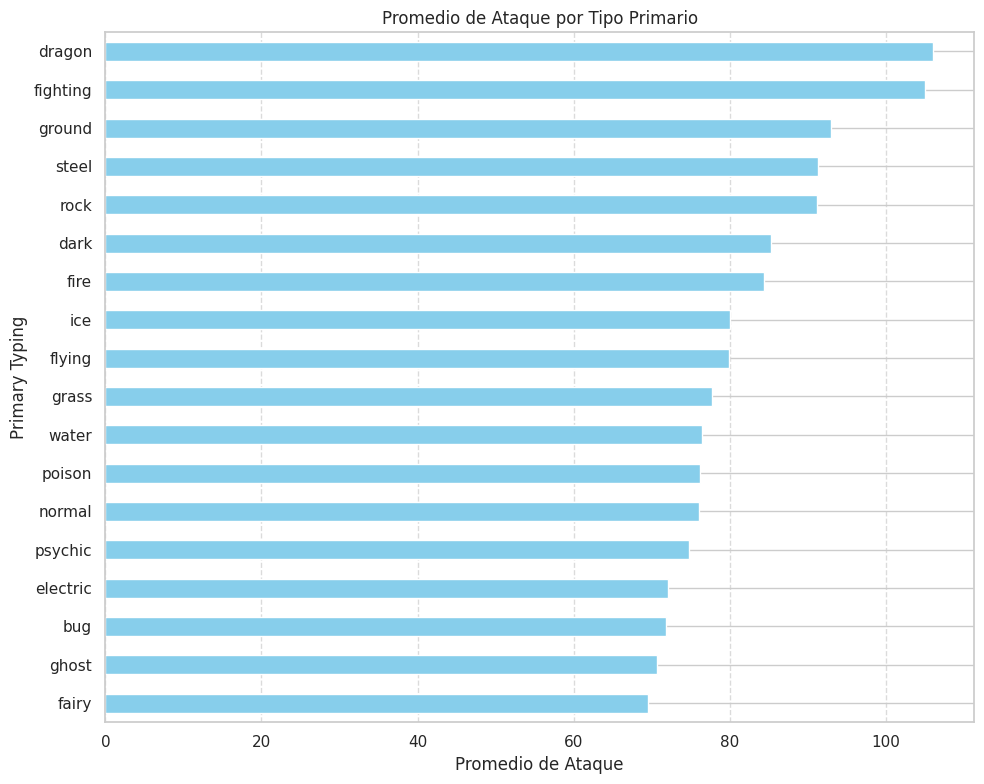

In [27]:
#6.Crea un grafico de barras horizontales con el promedio de Attack por Primary Typing.¬øCuales son los tres tipos con mayor promedio de ataque?¬øQue podrƒ±as concluir respecto al diseno del juego?

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por "Primary Typing" y calcular el promedio de "Attack"
attack_avg_by_type = df.groupby("Primary Typing")["Attack"].mean().sort_values(ascending=True)

# Graficar
plt.figure(figsize=(10, 8))
attack_avg_by_type.plot(kind='barh', color='skyblue')
plt.xlabel('Promedio de Ataque')
plt.title('Promedio de Ataque por Tipo Primario')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Los tres tipos primarios con mayor promedio de ataque son:

Dragon ‚Äì 105.98

Fighting ‚Äì 104.96

Ground ‚Äì 92.98

Conclusi√≥n sobre el dise√±o del juego:
Estos resultados sugieren que los tipos Dragon y Fighting han sido dise√±ados para tener un rol ofensivo fuerte en combate, probablemente para destacar su poder en batallas cuerpo a cuerpo o con movimientos de alta potencia. Esto puede reflejar una intenci√≥n de los desarrolladores de que estos tipos sean dominantes o raros, reforzando su prestigio o dificultad de obtenci√≥n en el juego.

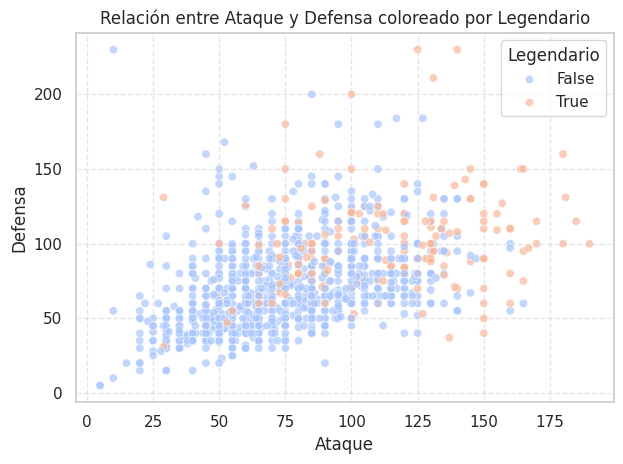

In [31]:
#7. Elabora un gr ÃÅafico de dispersi ÃÅon entre Attack y Defense, coloreado por la variable Legendary.
#¬øExiste una relaci ÃÅon clara entre ataque y defensa?
#¬øSe agrupan los Pok ÃÅemon legendarios?

import seaborn as sns
import matplotlib.pyplot as plt

:
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Legendary', palette='coolwarm', alpha=0.7)

# Personalizar el gr√°fico
plt.title('Relaci√≥n entre Ataque y Defensa coloreado por Legendario')
plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Legendario')
plt.tight_layout()
plt.show()

An√°lisis:
Relaci√≥n entre ataque y defensa: No parece haber una correlaci√≥n fuerte lineal entre ataque y defensa. Se observa una gran dispersi√≥n, lo cual sugiere que tener mucho ataque no implica necesariamente tener mucha defensa, y viceversa.

Agrupamiento de legendarios: Los Pok√©mon legendarios (en rojo) tienden a agruparse hacia la parte alta del gr√°fico, mostrando generalmente valores altos tanto en ataque como en defensa, aunque hay algunas excepciones.

# **Seccion 3: Razonamiento e Interpretacion**

8. **Interpreta la siguiente situacion:‚ÄúLa mediana de Speed es mas baja que la media, y hay varios outliers hacia la derecha del boxplot.‚Äù¬øQue indica sobre la distribucion? ¬øQue implicaciones tendrƒ±a en el juego?**


‚ÄúLa mediana de Speed es m√°s baja que la media, y hay varios outliers hacia la derecha del boxplot.‚Äù

¬øQu√© indica sobre la distribuci√≥n?
Distribuci√≥n asim√©trica positiva (sesgada a la derecha):

Si la media es mayor que la mediana, entonces la distribuci√≥n est√° sesgada hacia la derecha. Es decir, la mayor√≠a de los Pok√©mon tienen velocidades moderadas o bajas, pero hay algunos con valores de Speed excepcionalmente altos (outliers) que "empujan" la media hacia arriba.


Presencia de outliers hacia la derecha:

Esto refuerza lo anterior. Los outliers son Pok√©mon muy r√°pidos comparados con el resto. Estos pueden ser legendarios, mega evoluciones, o Pok√©mon de dise√±o especial para ser veloces.

9. **Escribe tres conclusiones generales que puedas obtener del analisis estadƒ±stico del dataset.**

üîπ 1. Ciertos tipos tienen ventajas ofensivas claras
El an√°lisis del promedio de Attack por tipo primario revel√≥ que tipos como Dragon, Fighting y Ground tienen valores promedio significativamente m√°s altos.

üëâ Conclusi√≥n: El dise√±o del juego probablemente favorece a estos tipos en roles ofensivos, haci√©ndolos m√°s poderosos en batalla y m√°s atractivos en equipos de ataque.

üîπ 2. Los Pok√©mon legendarios tienden a destacar en atributos clave
El gr√°fico de dispersi√≥n entre Attack y Defense mostr√≥ que los Pok√©mon legendarios suelen agruparse en los rangos altos de ambas estad√≠sticas.

üëâ Conclusi√≥n: Esto sugiere que los Pok√©mon legendarios est√°n dise√±ados para ser fuertes y vers√°tiles, justificando su rareza y su rol destacado dentro del juego.

üîπ 3. La distribuci√≥n de la velocidad es asim√©trica
La comparaci√≥n entre media y mediana de Speed, junto con la presencia de outliers, indica una distribuci√≥n sesgada a la derecha.

üëâ Conclusi√≥n: La mayor√≠a de los Pok√©mon tienen una velocidad media o baja, mientras que unos pocos (frecuentemente legendarios o especiales) son extremadamente r√°pidos, d√°ndoles una ventaja competitiva clara.

